# HW2 - Problem 3


In [0]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
from keras.datasets import cifar10

from keras.layers import Conv2D, MaxPooling2D, Dense, Activation, Flatten, Dropout
from keras.models import Sequential
from keras.optimizers import SGD

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
num_classes = 10
class_names = ['airplan', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [0]:

train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)


SyntaxError: ignored

In [0]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

# Overfit Model

We will overfit the model in a very similar way to how we overfit Fashion MNIST. By using an absurd number of nodes in the dense stage of the network, the model will attempt to learn far too many hidden features than exist, which will enividbly lead to simply memorizing the training set.

In [28]:

def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(400, activation='sigmoid', kernel_initializer='he_uniform'))
  model.add(Dense(200, activation='sigmoid'))
  model.add(Dense(10, activation='softmax'))
	# compile model
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

model = define_model()


# train the model
epochs = 50
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels),
                      batch_size = 32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 111s 2ms/step - loss: 2.1352 - acc: 0.2446 - val_loss: 1.9919 - val_acc: 0.3002
Epoch 2/50
50000/50000 [==============================] - 111s 2ms/step - loss: 1.9250 - acc: 0.3185 - val_loss: 1.8721 - val_acc: 0.3398
Epoch 3/50
50000/50000 [==============================] - 111s 2ms/step - loss: 1.8317 - acc: 0.3564 - val_loss: 1.7907 - val_acc: 0.3676
Epoch 4/50
50000/50000 [==============================] - 111s 2ms/step - loss: 1.7492 - acc: 0.3835 - val_loss: 1.7010 - val_acc: 0.4002
Epoch 5/50
50000/50000 [==============================] - 111s 2ms/step - loss: 1.6697 - acc: 0.4075 - val_loss: 1.6240 - val_acc: 0.4174
Epoch 6/50
50000/50000 [==============================] - 112s 2ms/step - loss: 1.5984 - acc: 0.4275 - val_loss: 1.5774 - val_acc: 0.4354
Epoch 7/50
50000/50000 [==============================] - 112s 2ms/step - loss: 1.5375 - acc: 0.4511 - val_loss: 1.5013 - 

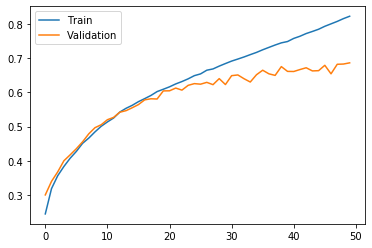

In [29]:
plt.plot(history.history['acc'], label="Train")
plt.plot(history.history['val_acc'], label="Validation")
plt.legend()

# Underfit model
To underfit the model, we can abuse max pooling. The purpose of max pooling is to extract the most important features found in a convolution. However, the problem with this is that if the max pool is too big (in this case 12x12), most of the information from the convolution will be lost. We can further worsen the situation by having the model filter into a small number of dense nodes, resulting in model being unable to learn much of anything.

In [49]:
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3,3), padding='same', input_shape=(32, 32, 3)))
  model.add(Activation('sigmoid'))
  model.add(MaxPooling2D(pool_size=(12,12)))
  model.add(Conv2D(32, (3,3), padding='same', ))
  model.add(Activation('sigmoid'))
  model.add(Dense(3))
  model.add(Activation('sigmoid'))
  model.add(Flatten())
  model.add(Dense(num_classes, activation='softmax'))
 
	# compile model
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

model = define_model()


# train the model
epochs = 50
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels),
                      batch_size = 32)
model = define_model()


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 37s 750us/step - loss: 2.3091 - acc: 0.0983 - val_loss: 2.3030 - val_acc: 0.1001
Epoch 2/50
50000/50000 [==============================] - 37s 735us/step - loss: 2.3032 - acc: 0.1013 - val_loss: 2.3030 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 36s 723us/step - loss: 2.3032 - acc: 0.0999 - val_loss: 2.3030 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 37s 730us/step - loss: 2.3031 - acc: 0.0995 - val_loss: 2.3024 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 36s 719us/step - loss: 2.3029 - acc: 0.0996 - val_loss: 2.3032 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 36s 728us/step - loss: 2.3028 - acc: 0.1017 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 36s 718us/step - loss: 2.3027 - acc: 0.1019 - val_loss: 2.

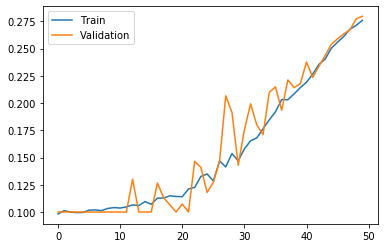

In [50]:
plt.plot(history.history['acc'], label="Train")
plt.plot(history.history['val_acc'], label="Validation")
plt.legend()

# Just right model

Cifar10 is not a simple dataset, so optimal models tend to use some sort of transfer learning to get decent results. However, we can still employ a fairly boilerplate model to get decent results 

In [0]:
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3,3), padding='same', input_shape=(32, 32, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(32, (3,3), padding='same', ))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Activation('relu'))
  model.add(Flatten())
  model.add(Dense(128))
  model.add(Activation('relu'))
  model.add(Dense(32))
  model.add(Activation('relu'))
  model.add(Dense(num_classes, activation='softmax'))
 
	# compile model
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

model = define_model()


# train the model
epochs = 50
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels),
                      batch_size = 32)
model = define_model()

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 79s 2ms/step - loss: 2.0049 - acc: 0.2757 - val_loss: 1.7364 - val_acc: 0.3839
Epoch 2/50
50000/50000 [==============================] - 78s 2ms/step - loss: 1.5910 - acc: 0.4264 - val_loss: 1.4660 - val_acc: 0.4639
Epoch 3/50
50000/50000 [==============================] - 78s 2ms/step - loss: 1.4204 - acc: 0.4898 - val_loss: 1.3651 - val_acc: 0.5078
Epoch 4/50
50000/50000 [==============================] - 79s 2ms/step - loss: 1.3109 - acc: 0.5326 - val_loss: 1.2725 - val_acc: 0.5447
Epoch 5/50
50000/50000 [==============================] - 78s 2ms/step - loss: 1.2295 - acc: 0.5624 - val_loss: 1.1755 - val_acc: 0.5843
Epoch 6/50
50000/50000 [==============================] - 78s 2ms/step - loss: 1.1480 - acc: 0.5946 - val_loss: 1.1535 - val_acc: 0.5960
Epoch 7/50
 5536/50000 [==>...........................] - ETA: 1:06 - loss: 1.1135 - acc: 0.6053

In [0]:
plt.plot(history.history['acc'], label="Train")
plt.plot(history.history['val_acc'], label="Validation")
plt.legend()